In [8]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import os

# look at the data
ecg_path = "/Users/camille/Desktop/EIAP/Python-R-Git/Series01-Python/data/ECGu.txt"
if not os.path.isfile(ecg_path):
	raise FileNotFoundError(f"{ecg_path} not found. Please check the file path.")
ECG = np.loadtxt(ecg_path)
print(ECG)
print(ECG.shape)

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)


In [10]:
#create a time vector t at the same length as ECG ans with a sampling rate of 1000 Hz
fs = 1000  # sampling rate in Hz
t = np.arange(len(ECG)) / fs
print(t)

[0.000e+00 1.000e-03 2.000e-03 ... 6.497e+00 6.498e+00 6.499e+00]


In [11]:
#rescale the ECG to mv knowing that the conversion is 1024 micro volt per unit
# ECG = ECG * 1024 / 1000  # in mv

analog_to_digital_conversion_gain = 1024  # in microvolt per unit
microvolt_to_mv = 1000
ECG = ECG * analog_to_digital_conversion_gain / microvolt_to_mv  # in mv

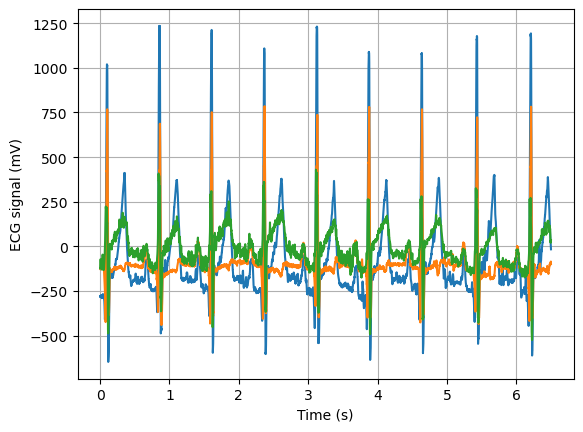

In [12]:
#plot the ecg data as a function of time t
plt.plot(t, ECG)
plt.xlabel("Time (s)")
plt.ylabel("ECG signal (mV)")
plt.grid()
plt.show() 

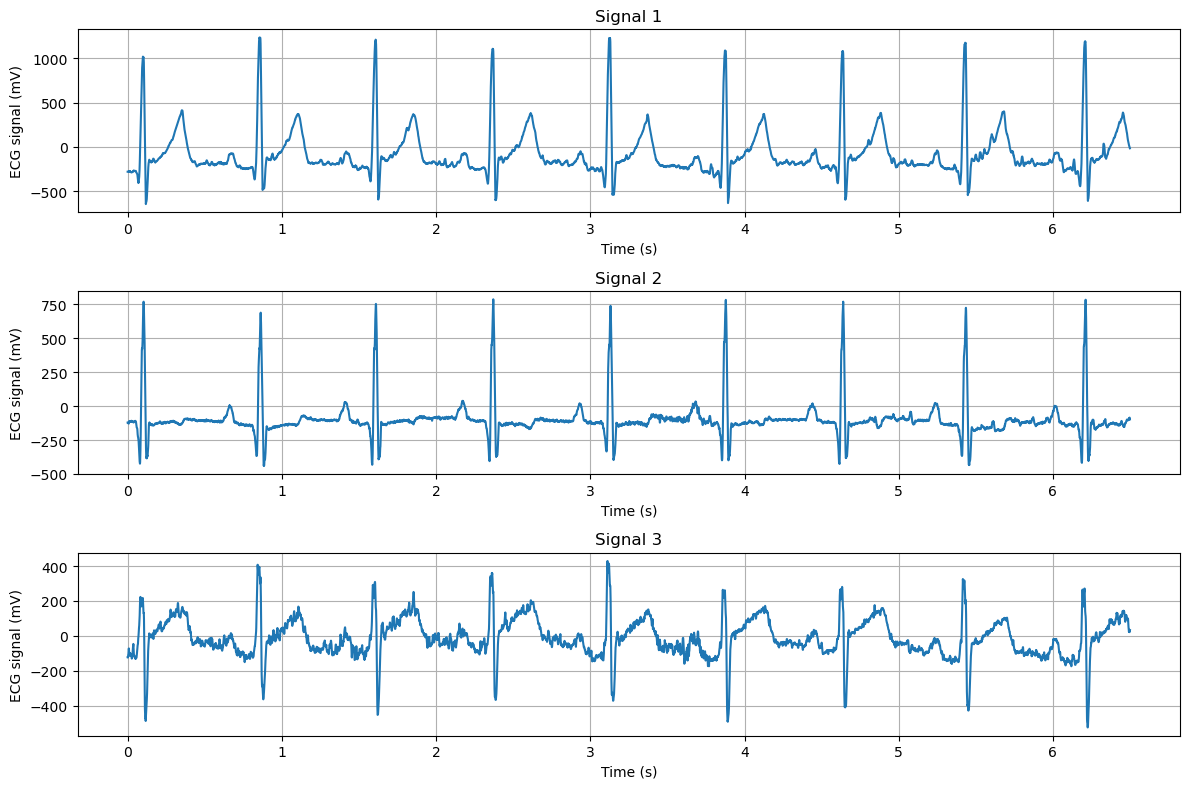

In [13]:
# Extract the 3 signal from the matrice of this ECG
signal1 = ECG[:, 0]
signal2 = ECG[:, 1]
signal3 = ECG[:, 2]

# Plot 3 signal on 3 separated plots
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal1)
plt.title("Signal 1")
plt.xlabel("Time (s)")
plt.ylabel("ECG signal (mV)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, signal2)
plt.title("Signal 2")
plt.xlabel("Time (s)")
plt.ylabel("ECG signal (mV)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, signal3)
plt.title("Signal 3")
plt.xlabel("Time (s)")
plt.ylabel("ECG signal (mV)")
plt.grid()

plt.tight_layout()
plt.show()

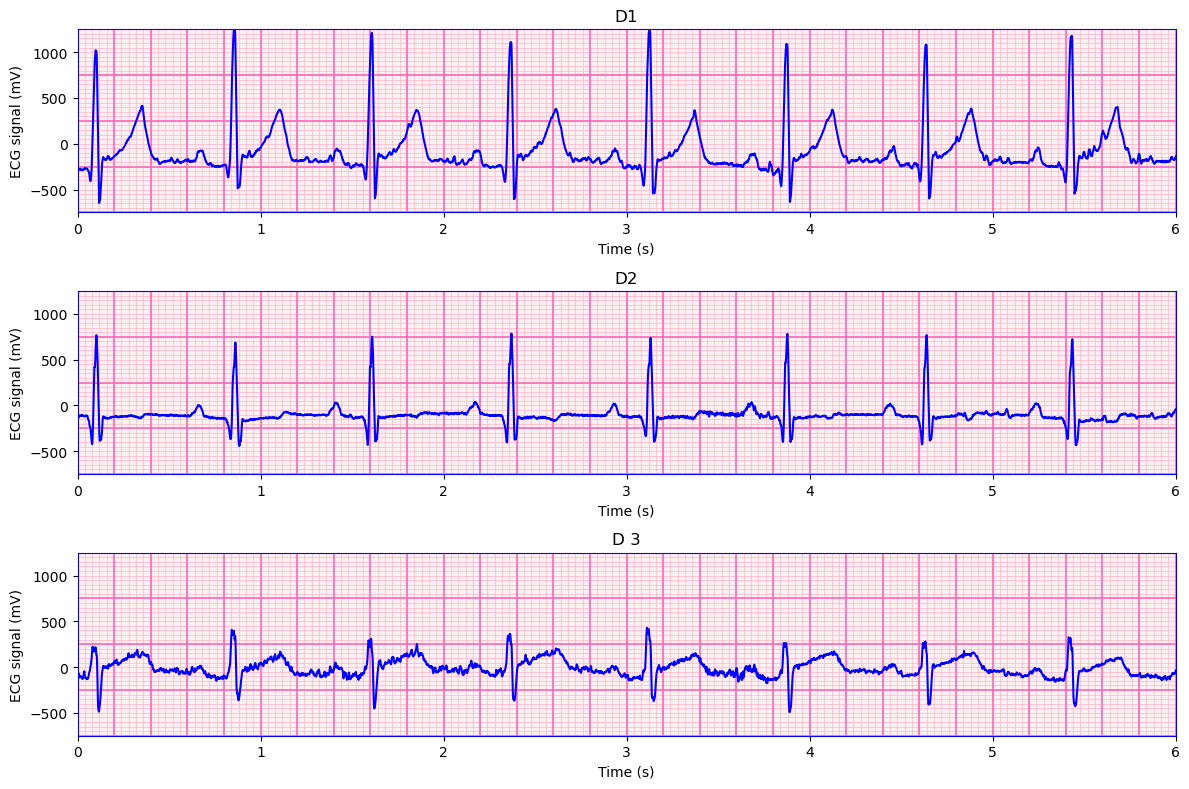

In [14]:
def ecg_grid(ax, t_min, t_max, y_min, y_max):
    """Dessine un quadrillage ECG harmonieux sur l'axe ax, fond rose pâle."""
    # Fond rose très pâle
    ax.set_facecolor("#fff0f5")
    # Petites mailles verticales (0,04 s)
    for x in np.arange(t_min, t_max + 0.04, 0.04):
        ax.axvline(x, color="#ffb6c1", linewidth=0.5, zorder=0)
    # Petites mailles horizontales (50 mV)
    for y in np.arange(y_min, y_max + 50, 50):
        ax.axhline(y, color="#ffb6c1", linewidth=0.5, zorder=0)
    # Grandes mailles verticales (0,20 s)
    for x in np.arange(t_min, t_max + 0.2, 0.2):
        ax.axvline(x, color="#ff69b4", linewidth=1.2, zorder=0)
    # Grandes mailles horizontales (500 mV)
    for y in np.arange(y_min, y_max + 500, 500):
        ax.axhline(y, color="#ff69b4", linewidth=1.2, zorder=0)
    # Cadre noir
    for spine in ax.spines.values():
        spine.set_color("blue")

# Définir les bornes du quadrillage
t_min, t_max = 0, 6
y_min, y_max = -750, 1250

plt.figure(figsize=(12, 8))

ax1 = plt.subplot(3, 1, 1)
ecg_grid(ax1, t_min, t_max, y_min, y_max)
ax1.plot(t, signal1, color="blue", zorder=10)
ax1.set_xlim(t_min, t_max)
ax1.set_ylim(y_min, y_max)
ax1.set_title("D1")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("ECG signal (mV)")

ax2 = plt.subplot(3, 1, 2)
ecg_grid(ax2, t_min, t_max, y_min, y_max)
ax2.plot(t, signal2, color="blue", zorder=10)
ax2.set_xlim(t_min, t_max)
ax2.set_ylim(y_min, y_max)
ax2.set_title("D2")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("ECG signal (mV)")

ax3 = plt.subplot(3, 1, 3)
ecg_grid(ax3, t_min, t_max, y_min, y_max)
ax3.plot(t, signal3, color="blue", zorder=10)
ax3.set_xlim(t_min, t_max)
ax3.set_ylim(y_min, y_max)
ax3.set_title("D 3")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("ECG signal (mV)")

plt.tight_layout()
plt.show()